Verisetini indiren kod:

In [ ]:
!gdown --id 1VOV-B9Ga_tgcm9UipwBEHVDNpmsU3QEe
!unzip dataset

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: dataset/0/137_3.bmp     
  inflating: dataset/0/137_4.bmp     
  inflating: dataset/0/138_3.bmp     
  inflating: dataset/0/141_3.bmp     
  inflating: dataset/0/141_4.bmp     
  inflating: dataset/0/142_1.bmp     
  inflating: dataset/0/149_0.bmp     
  inflating: dataset/0/14_0.bmp      
  inflating: dataset/0/151_3.bmp     
  inflating: dataset/0/157_2.bmp     
  inflating: dataset/0/159_2.bmp     
  inflating: dataset/0/160_3.bmp     
  inflating: dataset/0/160_4.bmp     
  inflating: dataset/0/161_3.bmp     
  inflating: dataset/0/167_2.bmp     
  inflating: dataset/0/170_0.bmp     
  inflating: dataset/0/171_3.bmp     
  inflating: dataset/0/172_3.bmp     
  inflating: dataset/0/173_2.bmp     
  inflating: dataset/0/175_0.bmp     
  inflating: dataset/0/178_0.bmp     
  inflating: dataset/0/180_2.bmp     
  inflating: dataset/0/181_3.bmp     
  inflating: dataset/0/182_1.bmp     
  inflating: dataset/0/184_0.bmp     
  i

Veriseti yapısı:

```
dataset/
--sınıf_adı/resimadi1, resimadi1...
--diger_sınıf/resimadi1, resimadi2...
...
```



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers 

image_gen = ImageDataGenerator(rescale=1./255, 
                               horizontal_flip=True, 
                               rotation_range=45, width_shift_range=0.1, 
                               height_shift_range=0.1, zoom_range=0.2, 
                               validation_split=0.2)

train_generator = image_gen.flow_from_directory(batch_size=32,
                                               directory='dataset/',
                                               shuffle=True,
                                               target_size=(28,28),
                                               subset='training',
                                               color_mode = "grayscale",
                                               )

valid_generator = image_gen.flow_from_directory(batch_size=32,
                                               directory='dataset/',
                                               shuffle=False,
                                               target_size=(28,28),
                                               subset='validation',
                                               color_mode="grayscale"
                                               )

Found 4004 images belonging to 10 classes.
Found 996 images belonging to 10 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])
tarihce = model.fit_generator(train_generator, epochs=50, 
                    steps_per_epoch=126,
                    validation_data=valid_generator,
                    validation_steps=32)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
126/126 [==============================] - 5s 35ms/step - loss: 2.1808 - accuracy: 0.1937 - val_loss: 1.7715 - val_accuracy: 0.3574
Epoch 2/50
126/126 [==============================] - 4s 35ms/step - loss: 1.6843 - accuracy: 0.3857 - val_loss: 1.4567 - val_accuracy: 0.4518
Epoch 3/50
126/126 [==============================] - 4s 34ms/step - loss: 1.4057 - accuracy: 0.4783 - val_loss: 1.3253 - val_accuracy: 0.5100
Epoch 4/50
126/126 [==============================] - 4s 34ms/step - loss: 1.2190 - accuracy: 0.5522 - val_loss: 1.2483 - val_accuracy: 0.5462
Epoch 5/50
126/126 [==============================] - 4s 34ms/step - loss: 1.0735 - accuracy: 0.5966 - val_loss: 1.0112 - val_accuracy: 0.6456
Epoch 6/50
126/126 [==============================] - 4s 35ms/step - loss: 0.9796 - accuracy: 0.6536 - val_loss: 1.0196 - val_accuracy: 0.6345
Epoch 7/50
126/126 [==============================] - 4s 34ms/step - loss: 0.9254 - accuracy: 0.6753 - val_loss: 0.8090 - val_accuracy: 0.7269

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


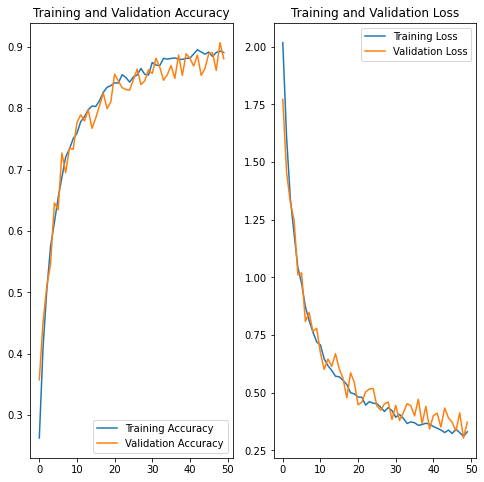

In [ ]:
acc = tarihce.history['accuracy']
val_acc = tarihce.history['val_accuracy']

loss = tarihce.history['loss']
val_loss = tarihce.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

Not: Model derlenirken loss="categorical_crossentropy", eğitilirken de fit yerine fit_generator kullanılıp aşağıdaki gibi olmalıdır.


```
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])
model.fit_generator(train_generator, epochs=50, 
                    steps_per_epoch=126,
                    validation_data=valid_generator,
                    validation_steps=32)
```



